In [64]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [65]:
full_df = pd.read_csv('chm_jail_data.csv', na_values = ['nan', 'Unknown', 'Other'])
selected_columns = [
    'booking_date', 'jacket_number','age_at_arrest', 'age_at_release', 'hours', 'marital_status', 'employment_status',
    'city', 'race', 'sex', 'STATE', 'citizenship', 'occupation',
    'school', 'prisoner_type'
]
pre_df = pd.read_csv('CLEAN_chm_jail_data.csv')


df = full_df[selected_columns]
pre_df

/var/folders/ss/n8_jvt095flbv8pcsl15jyqw0000gn/T/ipykernel_88315/322140863.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv('chm_jail_data.csv', na_values = ['nan', 'Unknown', 'Other'])


,booking_date,jacket_number,age_at_arrest,age_at_release,hours,marital_status,employment_status,city,race,sex,...,race_no,sex_no,STATE_no,citizenship_no,occupation_no,school_no,prisoner_type_no,r,r_count,offense_level
0,2012-01-01,22914,51.0,51.0,1,Divorced,Employed - Full Time,MAHOMET,Black,Male,...,0,0,0,0,4,0,0,True,1,Misdemeanor
1,2012-01-01,1024225,32.0,32.0,32,Single,Employed - Full Time,CHAMPAIGN,Black,Male,...,0,0,0,0,0,0,2,True,4,Felony
2,2012-01-01,1024226,20.0,20.0,12,Single,Employed - Part Time,ST JOSEPH,Black,Male,...,0,0,0,0,8,0,0,False,0,Misdemeanor
3,2012-01-01,1024227,20.0,20.0,10,Single,Unemployed,RANTOUL,Black,Male,...,0,0,0,0,2,0,2,False,0,Felony
4,2012-01-01,1024228,17.0,17.0,10,Single,Unemployed,CHAMPAIGN,Black,Male,...,0,0,0,0,0,0,3,True,6,Misdemeanor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40252,2018-06-30,1069755,32.0,32.0,0,Married,Employed - Full Time,URBANA,Black,Female,...,0,1,0,0,1,0,47,False,0,Felony
40253,2018-06-30,1000385,30.0,30.0,1,Single,Employed - Full Time,URBANA,Black,Female,...,0,1,0,0,1,0,0,False,0,Misdemeanor
40254,2018-06-30,990152,29.0,29.0,1,Single,Unemployed,VILLA GROVE,Black,Female,...,0,1,0,0,20,0,0,True,1,Misdemeanor
40255,2018-06-30,34365,46.0,46.0,13,Single,Employed - Full Time,DECATUR,Black,Female,...,0,1,0,0,9,0,0,True,1,Misdemeanor


In [66]:
new_df = df.drop_duplicates(subset=['booking_date', 'jacket_number'])
clean_df = new_df.copy()

clean_df['r_count'] = new_df.groupby('jacket_number')['jacket_number'].transform('count') - 1
clean_df['r'] = clean_df['r_count'] > 0
clean_df

,booking_date,jacket_number,age_at_arrest,age_at_release,hours,marital_status,employment_status,city,race,sex,STATE,citizenship,occupation,school,prisoner_type,r_count,r
0,1/1/2012,22914,51.0,51.0,1,Divorced,Employed - Full Time,CHAMPAIGN,White,Male,ILLINOIS,US,CONSTRUCTION WORKER,Graduated from high school,Misdemeanor Arraignment,1,True
3,1/1/2012,1024225,32.0,32.0,32,Single,Employed - Full Time,CHAMPAIGN,Hispanic,Male,ILLINOIS,US,UNEMPLOYED,Attends non-local school,Felony Arraignment,4,True
5,1/1/2012,1024226,20.0,20.0,12,Single,Employed - Part Time,CHICAGO,White,Male,ILLINOIS,US,"LABOR POOLS,lABORER,FRUIT PICKER,",NaN,Misdemeanor Arraignment,0,False
6,1/1/2012,1024227,20.0,20.0,10,Single,Unemployed,CHICAGO,White,Male,ILLINOIS,US,NaN,NaN,Felony Arraignment,0,False
7,1/1/2012,1024228,17.0,17.0,10,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,US,UNEMPLOYED,Completed GED Program,Traffic Arraignment,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67918,6/30/2018,1069755,32.0,32.0,0,Married,Employed - Full Time,URBANA,White,Female,ILLINOIS,US,"SERVICE PERSONNEL(HOTEL,RESTAURANT,NIGHT CLUB)",Non-attender,Intermittent,0,False
67919,6/30/2018,1000385,30.0,30.0,1,Single,Employed - Full Time,CHAMPAGIN,Black,Female,ILLINOIS,US,"SERVICE PERSONNEL(HOTEL,RESTAURANT,NIGHT CLUB)",Graduated from high school,Misdemeanor Arraignment,0,False
67920,6/30/2018,990152,29.0,29.0,1,Single,Unemployed,CHAMPAIGN,Black,Female,ILLINOIS,US,TEACHER,Graduated from high school,Misdemeanor Arraignment,1,True
67921,6/30/2018,34365,46.0,46.0,13,Single,Employed - Full Time,RANTOUL,White,Female,ILLINOIS,US,"CLERKS(GASSTATIONATTENDANT,CONVIENCESTORECLERK)",Non-attender,Misdemeanor Arraignment,1,True


In [67]:
sex_mapping = {'Male': 0, 'Female': 1}
clean_df['sex_no'] = clean_df['sex'].map(sex_mapping)

race_mapping = {'White': 0, 'Asian/Pacific Islander': 1, 'White (Hispanic)': 2, 'Native American': 3, 'Hispanic': 4, 'Black': 5, np.nan: 6}
clean_df['race_no'] = clean_df['race'].map(race_mapping)

school_level_mapping = {
    'Graduated from high school': 'High School',
    'Attends non-local school': 'High School',
    np.nan: np.nan,
    'Completed GED Program': 'High School',
    'READY High School': 'High School',
    'Non-attender': 'High School',
    'Urbana High School': 'High School',
    'Central High School': 'High School',
    'Centennial High School': 'High School',
    'Circle Academy': 'High School',
    'Parkland Community College': 'College',
    'Rantoul Township High School': 'High School',
    'Urbana Adult Ed': 'High School',
    'GED program--enrolled in or starting soon': 'High School',
    'St. Joseph-Ogden High School': 'High School',
    'Unity High School': 'High School',
    'The Pavilion School': 'High School',
    'Columbia Center High School': 'High School',
    'Attends other local school': 'High School',
    'Mahomet-Seymour High School': 'High School',
    'Storefront School': 'High School',
    'Unity Junior High School': 'Middle School',
    'READY Middle School': 'Middle School',
    'Academic Academy': 'High School',
    'St. Joseph Junior High School': 'Middle School',
    'Unknown to minor': np.nan,
    'Heritage Senior High School': 'High School',
    'Fisher Junior-Senior High School': 'High School',
    'HS of Saint Thomas Moore': 'High School',
    'Edison Middle School': 'Middle School',
    'University Laboratory High School': 'High School',
    'Heritage Junior High School': 'Middle School',
    'Urbana Middle School': 'Middle School',
    'Yankee Ridge': 'Elementary School',
    'Gerber School at CCH': 'High School',
    'Judah Christian': 'High School',
    'Novac Academy': 'High School',
    'Other': np.nan
}
clean_df['school'] = df['school'].map(school_level_mapping)

citizenship_mapping = {
    'US': 'UNITED STATES',
    'UNITED STATES': 'UNITED STATES',
    'Mexico': 'MEXICO',
    'Phillipines': 'PHILIPPINES',
    'Guatemala': 'GUATEMALA',
    'China (Republic of)': 'CHINA',
    'GAMBIA, THE': 'GAMBIA',
    'DENMARK': 'DENMARK',
    'Canada': 'CANADA',
    'Scotland': 'SCOTLAND',
    'CONGO, DEMOCRATIC REPUBLIC OF THE': 'CONGO',
    'South Korea': 'SOUTH KOREA',
    'Pakistan': 'PAKISTAN',
    'ROMANIA': 'ROMANIA',
    'ECUADOR': 'ECUADOR',
    'UKRAINE': 'UKRAINE',
    'Nigeria': 'NIGERIA',
    'India': 'INDIA',
    'ZAMBIA': 'ZAMBIA',
    'LEBANON': 'LEBANON',
    'Brazil': 'BRAZIL',
    'BOSNIA & HERZEGOVINA': 'BOSNIA AND HERZEGOVINA',
    'TAIWAN': 'TAIWAN',
    'ANGOLA': 'ANGOLA',
    'AUSTRALIA': 'AUSTRALIA',
    'United Kingdom': 'UNITED KINGDOM',
    'PERU': 'PERU',
    'Poland': 'POLAND',
    'Russia': 'RUSSIA',
    'ISRAEL': 'ISRAEL',
    'LIBERIA': 'LIBERIA',
    'CONGO (BRAZZAVILLE)': 'CONGO',
    'Iran': 'IRAN',
    'HONDURAS': 'HONDURAS',
    'GERMANY': 'GERMANY',
    'ARGENTINA': 'ARGENTINA',
    'COSTA RICA': 'COSTA RICA',
    'THAILAND': 'THAILAND',
    'France': 'FRANCE',
    'AUSTRIA': 'AUSTRIA',
    'JORDAN': 'JORDAN',
    'TURKEY, REPUBLIC OF': 'TURKEY',
    'NICARAGUA': 'NICARAGUA',
    'KENYA': 'KENYA',
    'KOREA, SOUTH': 'SOUTH KOREA',
    'BELGIUM': 'BELGIUM',
    'KAZAKHSTAN': 'KAZAKHSTAN',
    'NORWAY': 'NORWAY',
    'Cambodia': 'CAMBODIA',
    'Africa': 'AFRICA',
    'KOREA, NORTH': 'NORTH KOREA',
    'EL SALVADOR': 'EL SALVADOR',
    'SAUDIA ARABIA': 'SAUDI ARABIA',
    'NIGERIA': 'NIGERIA',
    'CHILE': 'CHILE',
    'CANADA': 'CANADA',
    'Laos': 'LAOS',
    'Jamaica': 'JAMAICA',
    'Vietnam': 'VIETNAM',
    'CAMBODIA': 'CAMBODIA',
    'HAITI': 'HAITI',
    'ALGERIA': 'ALGERIA',
    'CUBA': 'CUBA',
    'Portuguese': 'PORTUGAL',
    'Macedonia': 'MACEDONIA',
    'VIETNAM': 'VIETNAM',
    'BOLIVIA': 'BOLIVIA',
    'COLOMBIA': 'COLOMBIA',
    'DOMINICAN REPUBLIC': 'DOMINICAN REPUBLIC',
    'MOROCCO': 'MOROCCO',
    'ALBANIA': 'ALBANIA',
    'BELARUS': 'BELARUS',
    'LIBYA': 'LIBYA',
    'TONGA': 'TONGA',
    'SUDAN': 'SUDAN',
    'Ireland': 'IRELAND',
    'NEPAL': 'NEPAL',
    np.nan: np.nan
}
clean_df['citizenship'] = df['citizenship'].map(citizenship_mapping)

occupation_mapping = {
    'CONSTRUCTION WORKER': 'CONSTRUCTION WORKER',
    'UNEMPLOYED': 'UNEMPLOYED',
    'LABOR POOLS,lABORER,FRUIT PICKER,': 'LABORER',
    'PROFESSIONAL': 'PROFESSIONAL',
    'SERVICE PERSONNEL(HOTEL,RESTAURANT,NIGHT CLUB)': 'SERVICE INDUSTRY',
    'MECHANIC(REPAIR PERSON)': 'MECHANIC',
    'FACTORY WORKER': 'FACTORY WORKER',
    'RETAIL SALES,REAL ESTATE,INSURANCE,FREELANCE,': 'SALES',
    'RETIRED': 'RETIRED',
    'DISABLED': 'DISABLED',
    'ARMED SERVICES': 'MILITARY',
    'STUDENT(HIGH/MIDDLE/ELE./COLLEGE/VOCATIONAL)': 'STUDENT',
    'CLERKS(GASSTATIONATTENDANT,CONVIENCESTORECLERK)': 'CLERK',
    'HOUSEWIFE': 'HOUSEWIFE',
    'JANITORIAL': 'JANITORIAL',
    'LAWN WORKERS,LANDSCAPING': 'LANDSCAPER',
    'SELF EMPLOYED': 'SELF EMPLOYED',
    'ELECTRICIAN': 'ELECTRICIAN',
    'OFFICE WORKER': 'OFFICE WORKER',
    'FACTORY(MANAGEMENT,WORKER,ETC.)': 'FACTORY WORKER',
    'MASON,ROOFER,PAINTER,PLUMBER,': 'TRADESMAN',
    'TEACHER': 'TEACHER',
    'DAY CARE WORKER(BABYSITTER,ETC.)': 'CHILD CARE',
    'DRIVER(TAXI,BUS,TRUCK,LIMO,ETC.,)': 'DRIVER',
    'CARPENTER': 'CARPENTER',
    'FIREMAN': 'FIREFIGHTER',
    'MEDICAL - DOCTOR/DENTIST/ETC': 'MEDICAL PROFESSIONAL',
    'OFFICE(MANAGEMENT,WORKER,BOOKKEEPING,ACCOUNTANT,SE': 'OFFICE WORKER',
    'MEDICAL - NURSE/AIDE/ETC': 'MEDICAL PROFESSIONAL',
    'ENTERTAINER(DANCER,SINGER,COMEDIAN)': 'ENTERTAINER',
    'COSMOTOLIGIST(HARI,NAILS,FACIAL,ETC.)': 'COSMETOLOGIST',
    'PUBLIC SAFETY/LAW ENFORCEMENT - POLICE': 'LAW ENFORCEMENT',
    'BANK(TELLER,BANKER,MORTGAGEBROKER)': 'BANKING',
    'GUARD(SECURITY,ETC.)': 'SECURITY GUARD',
    'FACTORY MANAGEMENT': 'MANAGER',
    'OFFICE MANAGEMENT': 'MANAGER',
    'POSTAL EMPLOYEE': 'POSTAL WORKER',
    'MEDICAL - DOCTOR/DENTIST/NURSE/EMTS,': 'MEDICAL PROFESSIONAL',
    'ACTOR/MODEL/ACTRESS': 'ENTERTAINER',
    'POLICE (OFFICERS, SUPPORT PERSONNEL, ETC.)': 'LAW ENFORCEMENT',
    'PUBLIC EMPLOYEE': 'PUBLIC EMPLOYEE',
    'ATTORNEY': 'LAWYER',
    'CORRECTIONAL OFFICER': 'CORRECTIONAL OFFICER',
    'COOK': 'COOK',
    'PROFESSIONAL ATHLETE': 'ATHLETE',
    'PHOTOGRAPHER': 'PHOTOGRAPHER',
    'REPORTER,(NEWSPAPER, T.V.,)': 'JOURNALIST',
    'PROSTITUTION': 'PROSTITUTION',
    'AIRLINE PERSONNEL': 'AIRLINE WORKER',
    'PROFESSIONAL MUSICIAN': 'MUSICIAN',
    'FLORIST,ARTS/CRAFTS': 'FLORIST/ARTIST',
    'AMUSEMENT(DISNEY, SEAWORLD,MGM,WET&WILD,ETC.)': 'AMUSEMENT PARK WORKER',
    'EXTERMINATOR': 'EXTERMINATOR',
    'PACE OPERATOR': np.nan,
    'HONE': np.nan,
    'OTHER': np.nan,
    'ENCE': np.nan,
    'ANAG': np.nan,
    'HIER': np.nan,
    'OFER': np.nan,
    'NANC': np.nan,
    'NO VISIBLE MEANS': np.nan,
    'UNKNOWN': np.nan,
    np.nan: np.nan
}
clean_df['occupation'] = df['occupation'].map(occupation_mapping)

def correct_city(city):
    if isinstance(city, str) and city.lower().startswith('chi'):
        return 'CHICAGO'
    elif isinstance(city, str) and city.lower().startswith('cha'):
        return 'CHAMPAIGN'
    else:
        return city
clean_df['city'] = df['city'].apply(correct_city)

In [68]:
subset_size = 500
subset_indices = np.random.choice(clean_df.index, size=subset_size, replace=False)
subset_df = clean_df.loc[subset_indices].copy()

nan_indices_subset = np.random.choice(subset_df.index, size=int(subset_size * 0.5), replace=False)
subset_df.loc[nan_indices_subset, 'occupation'] = np.nan

subset_df.loc[nan_indices_subset, 'occupation']

14741    NaN
53035    NaN
3967     NaN
49363    NaN
1242     NaN
        ... 
41180    NaN
40140    NaN
51788    NaN
29584    NaN
59886    NaN
Name: occupation, Length: 250, dtype: object

In [69]:

impute_col = 'occupation'
impute_col_encoded = 'occupation_no'

le = LabelEncoder()
le.fit(clean_df.loc[:, impute_col])

occupation_value_counts = clean_df['occupation'].value_counts()
sorted_occupations = occupation_value_counts.index.tolist()
sorted_occupations = [occupation for occupation in sorted_occupations if not pd.isnull(occupation)]
sorted_le_classes = sorted(le.classes_, key=lambda x: sorted_occupations.index(x) if x in sorted_occupations else len(sorted_occupations))
le.classes_ = np.array(sorted_le_classes)

subset_df[impute_col_encoded] = le.transform(subset_df[impute_col].fillna(np.nan).values)
subset_df[impute_col_encoded] = subset_df[impute_col_encoded].map(lambda x: np.nan if x >= 45 else x)

imputer = IterativeImputer(random_state=42)
df_train = subset_df.loc[:, ['age_at_arrest', 'age_at_release', 'hours', 'sex_no', 'race_no', 'occupation_no']]
imputer.fit(df_train)

df_imputed = imputer.transform(df_train)
subset_df[impute_col_encoded] = df_imputed[:, -1].round().astype(int)

reverse_occupation_mapping = {i: label for i, label in enumerate(le.classes_)}
subset_df['occupation_imputed'] = subset_df[impute_col_encoded].map(reverse_occupation_mapping)

comparison_df = pd.merge(subset_df[['occupation', 'occupation_imputed']], clean_df[['occupation']], left_index=True, right_index=True)

match_rate = (comparison_df['occupation_imputed'] == comparison_df['occupation_y']).mean()

print("Rate of matching values between 'occupation_imputed' and 'occupation':", match_rate)

Rate of matching values between 'occupation_imputed' and 'occupation': 0.492


In [70]:
match_rates = {}

columns_to_impute = ['marital_status', 'employment_status', 'city', 'race', 'sex', 'STATE', 'citizenship', 'occupation', 'school', 'prisoner_type']

for col in columns_to_impute:
    subset_size = 10000
    subset_indices = np.random.choice(clean_df.index, size=subset_size, replace=False)
    subset_df = clean_df.loc[subset_indices].copy()

    nan_indices_subset = np.random.choice(subset_df.index, size=int(subset_size * 0.5), replace=False)
    subset_df.loc[nan_indices_subset, col] = np.nan

    impute_col_encoded = col + '_no'

    le = LabelEncoder()
    le.fit(clean_df.loc[:, col])

    subset_df[impute_col_encoded] = le.transform(subset_df[col].fillna(np.nan).values)
    subset_df[impute_col_encoded] = subset_df[impute_col_encoded].map(lambda x: np.nan if x >= (len(le.classes_) - 1) else x)

    imputer = IterativeImputer(random_state=42)
    df_train = subset_df.loc[:, ['age_at_arrest', 'age_at_release', 'hours', 'sex_no', 'race_no', impute_col_encoded]]
    imputer.fit(df_train)

    df_imputed = imputer.transform(df_train)
    subset_df[impute_col_encoded] = df_imputed[:, -1].round().astype(int)

    reverse_mapping = {i: label for i, label in enumerate(le.classes_)}
    subset_df[col + '_imputed'] = subset_df[impute_col_encoded].map(reverse_mapping)

    comparison_df = pd.merge(subset_df[[col, col + '_imputed']], clean_df[[col]], left_index=True, right_index=True)

    match_rate = (comparison_df[col + '_imputed'] == comparison_df[col + '_y']).mean()
    match_rates[col] = match_rate

match_rates_df = pd.DataFrame.from_dict(match_rates, orient='index', columns=['mice_match_rate'])

match_rates_df

,mice_match_rate
marital_status,0.7054
employment_status,0.4988
city,0.4971
race,0.5224
sex,0.8646
STATE,0.9822
citizenship,0.5558
occupation,0.4550
school,0.9280
prisoner_type,0.4971


In [71]:
match_rates = {}

for col in columns_to_impute:
    subset_size = 10000
    subset_indices = np.random.choice(clean_df.index, size=subset_size, replace=False)
    subset_df = clean_df.loc[subset_indices].copy()

    nan_indices_subset = np.random.choice(subset_df.index, size=int(subset_size * 0.5), replace=False)
    subset_df.loc[nan_indices_subset, col] = np.nan

    imputer = SimpleImputer(strategy='most_frequent')
    imputed_values = imputer.fit_transform(subset_df[[col]])

    subset_df[col + '_imputed'] = imputed_values.flatten()

    comparison_df = pd.merge(subset_df[[col, col + '_imputed']], clean_df[[col]], left_index=True, right_index=True)

    match_rate = (comparison_df[col + '_imputed'] == comparison_df[col + '_y']).mean()
    match_rates[col] = match_rate

mode_match_rates_df = pd.DataFrame.from_dict(match_rates, orient='index', columns=['mode_match_rate'])

print(mode_match_rates_df)

                   mode_match_rate
marital_status              0.8723
employment_status           0.7171
city                        0.6976
race                        0.7666
sex                         0.8704
STATE                       0.9819
citizenship                 0.9695
occupation                  0.6614
school                      0.9315
prisoner_type               0.6022


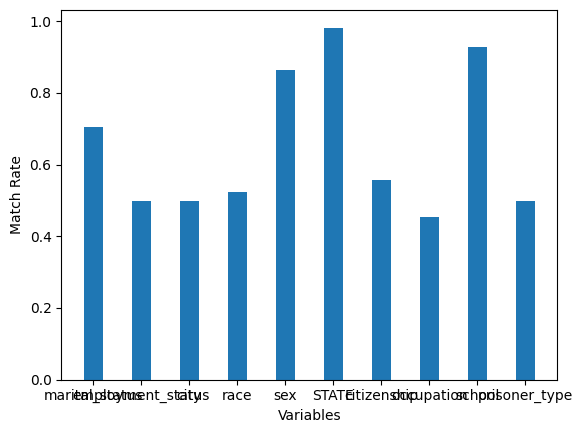

In [72]:
import matplotlib.pyplot as plt

match_rates_df['variables'] = columns_to_impute

plt.bar(match_rates_df['variables'], match_rates_df['mice_match_rate'], 
        width = 0.4)
 
plt.xlabel("Variables")
plt.ylabel("Match Rate")
plt.show()

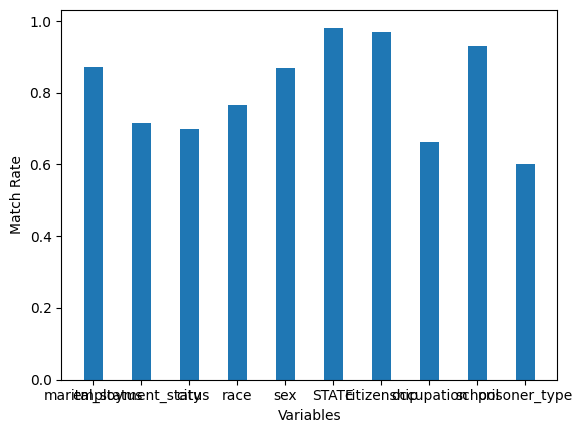

In [73]:
plt.bar(match_rates_df['variables'], mode_match_rates_df['mode_match_rate'], 
                width = 0.4)
 
plt.xlabel("Variables")
plt.ylabel("Match Rate")
plt.show()

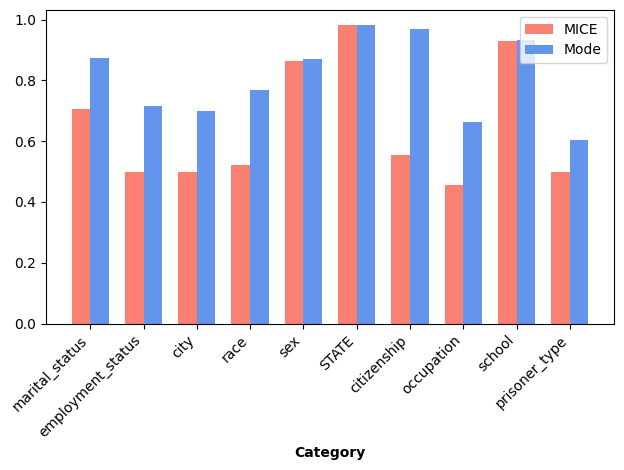

In [74]:
data = {
    'Category': match_rates_df['variables'],
    'MICE': match_rates_df['mice_match_rate'],
    'Mode': mode_match_rates_df['mode_match_rate']
}
df = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(df['Category']))
r2 = [x + bar_width for x in r1]

# Define pastel colors
illini_orange = '#FA8072'
illini_blue = '#6495ED'

# Create the bar chart with pastel colors
plt.bar(r1, df['MICE'], color=illini_orange, width=bar_width, label='MICE')
plt.bar(r2, df['Mode'], color=illini_blue, width=bar_width, label='Mode')

# Add labels and legend
plt.xlabel('Category', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(df['Category']))], df['Category'], rotation=45, ha='right') # Rotate labels
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()